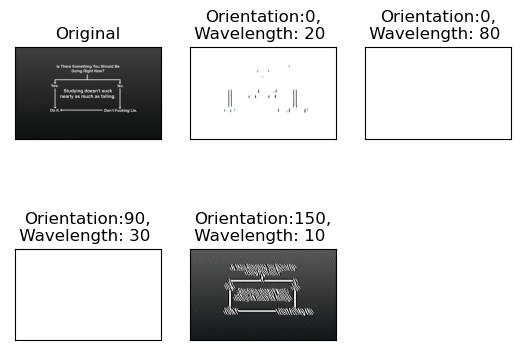

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread(r'D:\wallpaper\wall.jpg')

# Resize the image to fit the screen
height, width, _ = img.shape
max_size = max(height, width)
if max_size > 1000:
    scale = 1000 / max_size
    img = cv2.resize(img, (0, 0), fx=scale, fy=scale)

# Define the parameters for the Gabor filters
ksize = 31  # Kernel size (odd value)
sigma = 5  # Standard deviation of Gaussian kernel
phi = 0  # Phase offset of sinusoidal factor
orientations = [0, 0, 90, 150]  # Orientation of the Gabor filters (in degrees)
wavelengths = [20, 80, 30, 10]  # Wavelength of sinusoidal factor

# Create the Gabor filters using the specified parameters
kernels = []
for i in range(len(orientations)):
    theta = np.radians(orientations[i])
    lamda = wavelengths[i]
    gamma = 0.5  # Spatial aspect ratio
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
    kernels.append(kernel)

# Apply the Gabor filters to the image
filtered_images = []
for kernel in kernels:
    filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)
    filtered_images.append(filtered)

# Display the original and filtered images
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
for i in range(len(orientations)):
    plt.subplot(2, 3, i+2), plt.imshow(filtered_images[i], cmap='gray')
    plt.title('Orientation:{},\n Wavelength: {}  '.format(orientations[i], wavelengths[i]))
    plt.xticks([]), plt.yticks([])
plt.show()


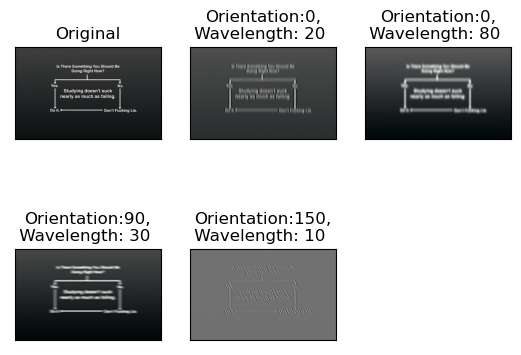

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread(r'D:\wallpaper\wall.jpg')

# Resize the image to fit the screen
height, width, _ = img.shape
max_size = max(height, width)
if max_size > 1000:
    scale = 1000 / max_size
    img = cv2.resize(img, (0, 0), fx=scale, fy=scale)

# Define the parameters for the Gabor filters
ksize = 31  # Kernel size (odd value)
sigma = 5  # Standard deviation of Gaussian kernel
phi = 0  # Phase offset of sinusoidal factor
orientations = [0, 0, 90, 150]  # Orientation of the Gabor filters (in degrees)
wavelengths = [20, 80, 30, 10]  # Wavelength of sinusoidal factor

# Create the Gabor filters using the specified parameters
kernels = []
for i in range(len(orientations)):
    theta = np.radians(orientations[i])
    lamda = wavelengths[i]
    gamma = 0.5  # Spatial aspect ratio
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
    kernels.append(kernel)

# Apply the Gabor filters to the image
filtered_images = []
for kernel in kernels:
    filtered = cv2.filter2D(img, cv2.CV_32F, kernel)
    filtered = cv2.normalize(filtered, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    filtered_images.append(filtered)

# Display the original and filtered images
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
for i in range(len(orientations)):
    plt.subplot(2, 3, i+2), plt.imshow(filtered_images[i], cmap='gray')
    plt.title('Orientation:{},\n Wavelength: {}  '.format(orientations[i], wavelengths[i]))
    plt.xticks([]), plt.yticks([])
plt.show()
